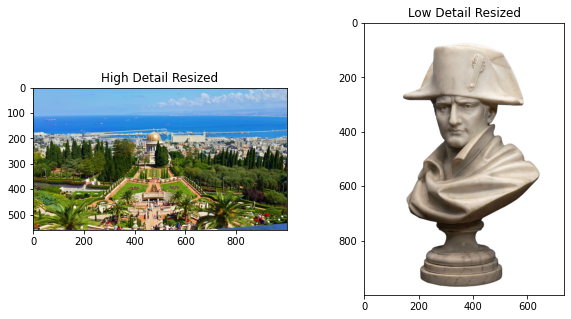

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def resize(img):
    
    w, h = img.size
    max_dim = max(w, h)
    
    if max_dim > 1000:
        
        t = 1000 / max_dim
        img = img.resize((int(w * t), int(h * t)))
        
    return img

image_path1 = 'haifa.jpeg'
image_path2 = 'less.jpg'

img1 = Image.open(image_path1)
img2 = Image.open(image_path2)

img1_resized = resize(img1)

img2_resized = resize(img2)
img1_resized.save('high_detail.jpg')
img2_resized.save('low_detail.jpg')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1_resized)
plt.title('High Detail Resized')

plt.subplot(1,2,2)
plt.imshow(img2_resized)
plt.title('Low Detail Resized')
plt.show()


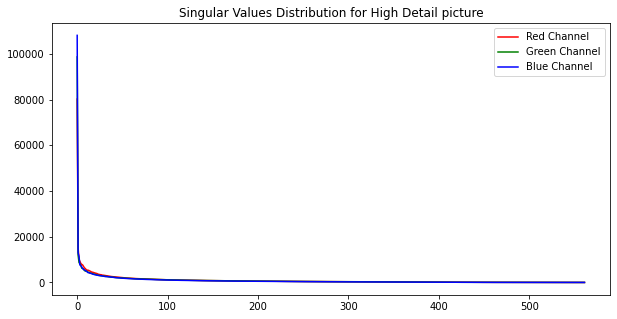

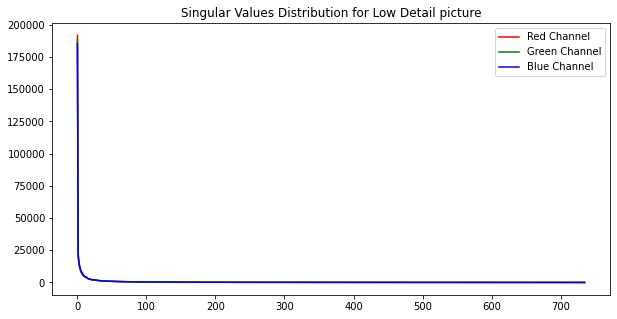

In [22]:
def singular_values(img, title):
    
    r, g, b = img.split()
    
    u_r, s_r, vh_r = np.linalg.svd(np.array(r))
    u_g, s_g, vh_g = np.linalg.svd(np.array(g))
    u_b, s_b, vh_b = np.linalg.svd(np.array(b))
    
    plt.figure(figsize=(10,5))
    plt.plot(s_r, 'r', label='Red')
    plt.plot(s_g, 'g', label='Green')
    plt.plot(s_b, 'b', label='Blue')
    plt.title(title)
    plt.legend()
    plt.show()

singular_values(img1_resized, 'Singular Values Distribution for High Detail picture')
singular_values(img2_resized, 'Singular Values Distribution for Low Detail picture')


Rank 10 - Error for High Detail picture: 215524.36819997872, Error for Low Detail picture: 229534.29807329449


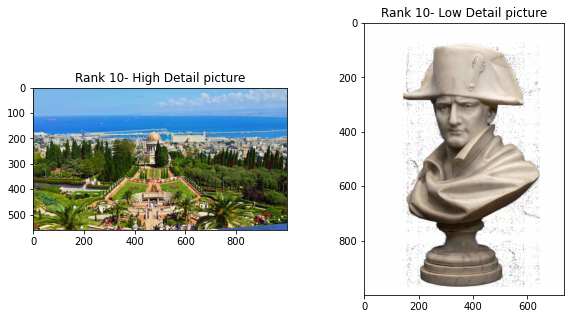

Rank 50 - Error for High Detail picture: 211438.61953295098, Error for Low Detail picture: 183688.40622913575


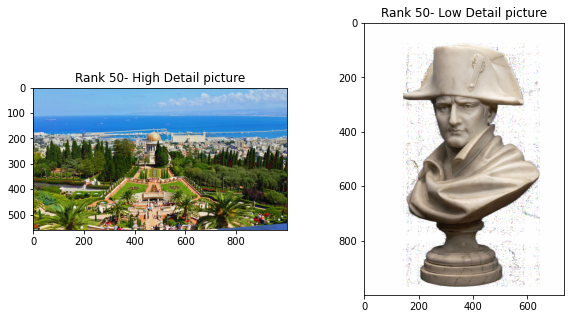

Rank 100 - Error for High Detail picture: 209417.9205297388, Error for Low Detail picture: 166853.0845594411


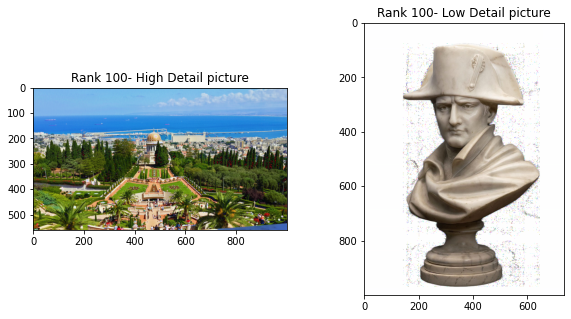

Rank 200 - Error for High Detail picture: 204866.60189498923, Error for Low Detail picture: 130389.39723765886


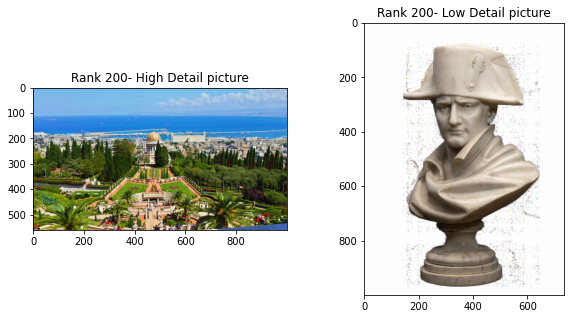

Rank 300 - Error for High Detail picture: 191794.73526142474, Error for Low Detail picture: 67199.56854772208


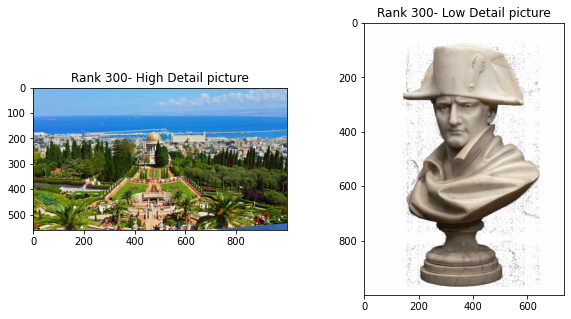

In [28]:
def rank_approx(img, rank):
    
    r, g, b = img.split()
    
    channels = [np.array(channel) for channel in [r, g, b]]
    approx_channels = []
    
    for channel in channels:
        u, s, vh = np.linalg.svd(channel)
        approx_channels.append(np.dot(u[:, :rank], np.dot(np.diag(s[:rank]), vh[:rank, :])))
    
    return Image.merge("RGB", [Image.fromarray(np.uint8(channel)) for channel in approx_channels])

for rank in [10, 50, 100, 200, 300]:
    
    approx1 = rank_approx(img1_resized, rank)
    error1 = np.linalg.norm(np.array(img1_resized) - np.array(approx1))
    
    approx2 = rank_approx(img2_resized, rank)
    error2 = np.linalg.norm(np.array(img2_resized) - np.array(approx2))
    
    print(f"Rank {rank} - Error for High Detail picture: {error1}, Error for Low Detail picture: {error2}")

    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.imshow(approx_img1)
    plt.title(f'Rank {rank}- High Detail picture')
    
    plt.subplot(1,2,2)
    plt.imshow(approx_img2)
    plt.title(f'Rank {rank}- Low Detail picture')
    
    plt.show()


In [8]:
%pip install ucimlrepo

You should consider upgrading via the '/Users/roohaan111/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [63]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  

  
# variable information 
print(X) 


     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [65]:
cum_var_explained_iris

[0.9653029806531566, 0.9983719319668035, 0.9996275854698325, 1.0]

In [61]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
print(X) 



      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  